In [2]:
#Import packages
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#Read and prepare data
data = pd.read_csv('Wine.csv')
data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [3]:
data.shape

(25, 7)

In [4]:
target = data.Price
features = sm.add_constant(data[['WinterRain','AGST','HarvestRain','Age']], prepend=False)

#Fit model
mod = sm.OLS(target,features)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           2.04e-07
Time:                        19:44:53   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
WinterRain      0.0011      0.001      2.120      

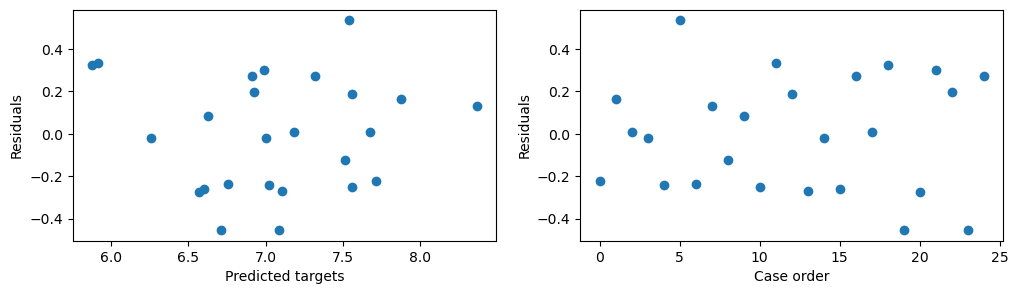

In [5]:
#Create residual plots
fig = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.scatter(res.fittedvalues,res.resid)
plt.ylabel('Residuals')
plt.xlabel('Predicted targets')

plt.subplot(1, 2, 2)
plt.scatter(list(range(25)),res.resid)
plt.ylabel('Residuals')
plt.xlabel('Case order')
plt.show()
#fig.savefig('ResidualPlots.pdf', bbox_inches='tight')

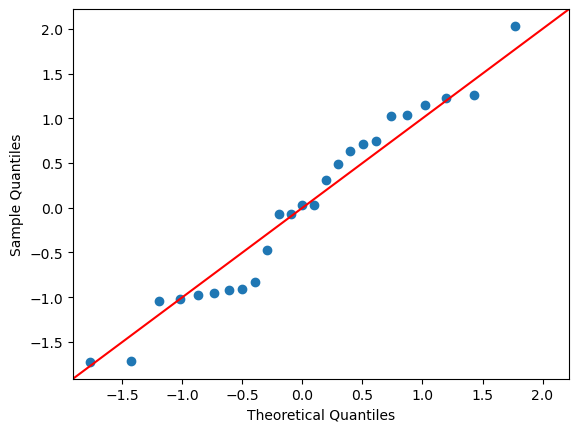

In [6]:
#Create QQ-plot
fig = sm.qqplot(res.resid, stats.t, fit=True, line='45')
plt.show()
#fig.savefig('QQplot.pdf',bbox_inches='tight')

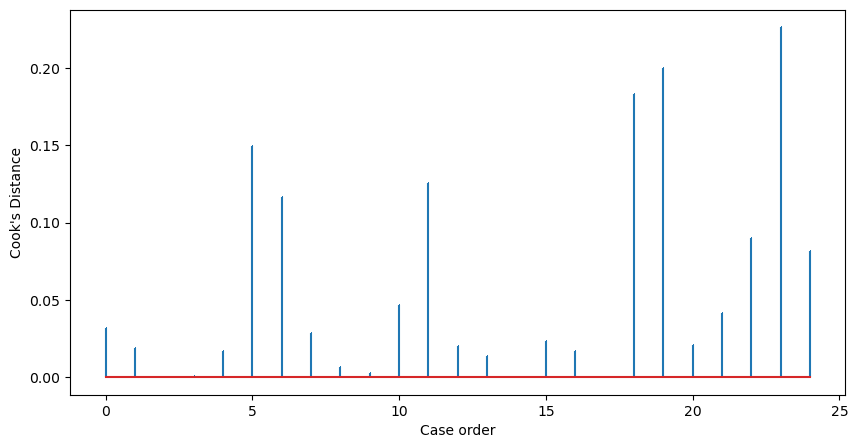

In [7]:
#Create influence plot
influence = res.get_influence()
(c, p) = influence.cooks_distance #c is the distance and p is p-value
fig = plt.figure(figsize=(10,5))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.xlabel('Case order')
plt.ylabel('Cook\'s Distance')
plt.show()
#fig.savefig('Cooks.pdf',bbox_inches='tight')

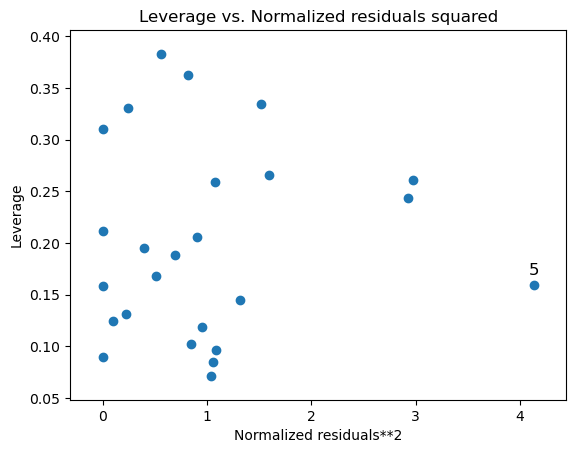

In [8]:
#Create leverage plot
fig = plot_leverage_resid2(res)
#fig.savefig('Leverage.pdf',bbox_inches='tight')